In [15]:
from math import sqrt,cos,sin,pi
import numpy as np
from scipy import integrate
import scipy.optimize
import multiprocessing
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import scipy.io


L=0.0067;

In [13]:
def f(t,y):
    
    # AU=1.496*10**11;
    # M0=1.989*10**30;
    # year=365*24*60*60;

    G=39.4316;
    
    GM=G;
    Ge=G*3.0025*10**(-6);
    Ga=0*G*3.6953*10**(-8);
    
    rse=sqrt((y[ 0]-y[ 6])**2+(y[ 1]-y[ 7])**2+(y[ 2]-y[ 8])**2);
    rsa=sqrt((y[12]-y[ 6])**2+(y[13]-y[ 7])**2+(y[14]-y[ 8])**2);
    rae=sqrt((y[ 0]-y[12])**2+(y[ 1]-y[13])**2+(y[ 2]-y[14])**2);
    
    n = len(y)      # 1: implies its a single ODE
    rk = np.zeros((n,1))
    
    rk=[y[3],
        y[4],
        y[5],
        GM*(y[6]-y[0])/rse**2 + Ga*(y[12]-y[0])/rae**2,
        GM*(y[7]-y[1])/rse**2 + Ga*(y[13]-y[1])/rae**2,
        GM*(y[8]-y[2])/rse**2 + Ga*(y[14]-y[2])/rae**2,
        y[9],
        y[10],
        y[11],
        Ge*(y[0]-y[6])/rse**2 + Ga*(y[12]-y[6])/rsa**2,
        Ge*(y[1]-y[7])/rse**2 + Ga*(y[13]-y[7])/rsa**2,
        Ge*(y[2]-y[8])/rse**2 + Ga*(y[14]-y[8])/rsa**2,
        y[15],
        y[16],
        y[17],
        Ge*(y[0]-y[12])/rae**2 + GM*(y[6]-y[12])/rsa**2,
        Ge*(y[1]-y[13])/rae**2 + GM*(y[7]-y[13])/rsa**2,
        Ge*(y[2]-y[14])/rae**2 + GM*(y[8]-y[14])/rsa**2],

    return rk;


In [3]:
def earsunsat(xe,ve,xs,vs,xa,va):

    t_start = 0.0
    t_final = 1.01
    delta_t = 1/(365*24*60*6)
    # Number of time steps: 1 extra for initial condition
    num_steps = np.floor((t_final - t_start)/delta_t) + 1
  
    
    r = integrate.ode(f).set_integrator('dopri5', method='bdf')
    
    
    initial=[xe[0],xe[1],xe[2],
             ve[0],ve[1],ve[2],
             xs[0],xs[1],xs[2],
             vs[0],vs[1],vs[2],
             xa[0],xa[1],xa[2],
             va[0],va[1],va[2]];
    
    r.set_initial_value(initial, t_start)
    
    t = np.zeros((num_steps, 1))
    x = np.zeros((num_steps, 18))
    t[0] = t_start
    x[0] = initial
    
    
    k = 1
    while r.successful() and k < num_steps:
        r.integrate(r.t + delta_t)
 
        # Store the results to plot later
        t[k] = r.t
        x[k] = r.y
        k += 1
 
        
    E=x[:,0:3];
    Ev=x[:,3:6];
    S=x[:,6:9];
    Sv=x[:,9:12];
    A=x[:,12:15];
    Av=x[:,15:18];
        
    return E,Ev,S,Sv,A,Av


In [4]:
def sat1():
    L=0.0067;
    global xe,ve,xs,vs

    xe=[1.0167,0,0];
    ve=[0,6.1745,0];
    xs=[0,0,0];
    vs=[0,0,0];
    xa=[0.9611,-0.3295,L/2];
    va=[2.0364,5.8381,0];
    
    global E1,Ev1,S,Sv,A1,Av1

    [E1,Ev1,S,Sv,A1,Av1]= earsunsat(xe,ve,xs,vs,xa,va);
    

In [5]:
def sat2(pha1):
    xa=[A1[pha1,0]*cos(2*pi/3)-A1[pha1,1]*sin(2*pi/3),A1[pha1,1]*cos(2*pi/3)+A1[pha1,0]*sin(2*pi/3),A1[pha1,2]];
    va=[Av1[pha1,0]*cos(2*pi/3)-Av1[pha1,1]*sin(2*pi/3),Av1[pha1,1]*cos(2*pi/3)+Av1[pha1,0]*sin(2*pi/3),Av1[pha1,2]];

    [E2,Ev2,S,Sv,A2,Av2]= earsunsat(xe,ve,xs,vs,xa,va);
    np.save('./sat2temp',A2)
    

In [6]:
def sat3(pha2):
    xa=[A1[pha2,0]*cos(4*pi/3)-A1[pha2,1]*sin(4*pi/3),A1[pha2,1]*cos(4*pi/3)+A1[pha2,0]*sin(4*pi/3),A1[pha2,2]];
    va=[Av1[pha2,0]*cos(4*pi/3)-Av1[pha2,1]*sin(4*pi/3),Av1[pha2,1]*cos(4*pi/3)+Av1[pha2,0]*sin(4*pi/3),Av1[pha2,2]];


    [E3,Ev3,S,Sv,A3,Av3]= earsunsat(xe,ve,xs,vs,xa,va);
    np.save('./sat3temp',A3)
    

In [7]:
def ditances(E1,E2,E3):
    E12=np.sqrt((E1[:,0]-E2[:,0])**2+(E1[:,1]-E2[:,1])**2+(E1[:,2]-E2[:,2])**2);
    E13=np.sqrt((E1[:,0]-E3[:,0])**2+(E1[:,1]-E3[:,1])**2+(E1[:,2]-E3[:,2])**2);
    E32=np.sqrt((E3[:,0]-E2[:,0])**2+(E3[:,1]-E2[:,1])**2+(E3[:,2]-E2[:,2])**2);
        
    plt.plot(E12,'r');
    plt.plot(E13,'b');
    plt.plot(E32,'g');
            
    return np.sum(np.square(E12-L))+np.sum(np.square(E13-L))+np.sum(np.square(E32-L))
            
    

In [8]:
def run(pha1,pha2):

    p1 = multiprocessing.Process(target=sat2, args=(pha1,))
    p2 = multiprocessing.Process(target=sat3, args=(pha2,))
    p1.start()
    p2.start()

    
    p1.join()
    p2.join()

    A2=np.load('./sat2temp.npy')
    A3=np.load('./sat3temp.npy')
    
    #os.remove('./sat2temp.npy')
    #os.remove('./sat3temp.npy')
    
    min=ditances(A1,A2,A3)
    print(pha1,pha2,min)
    
    return min

In [19]:
sat1()

banana = lambda pha: run(pha[0],pha[1])
guess = [4000,2000] #just some guess
scipy.optimize.fmin(banana, guess,xtol=0.25,ftol=0.25)


4000.0 2000.0 40720.6368489
4200.0 2000.0 33221.1366499
4000.0 2100.0 40873.9634174
4200.0 1900.0 33658.4643329


Process Process-9:
Process Process-10:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-16-3547007b2ba0>", line 6, in sat3
    [E3,Ev3,S,Sv,A3,Av3]= earsunsat(xe,ve,xs,vs,xa,va);
  File "<ipython-input-13-b8f9b9ad6951>", line 30, in earsunsat
    r.integrate(r.t + delta_t)
  File "/home/elsy/workspace/PyLisa/env/lib/python3.5/site-packages/scipy/integrate/_ode.py", line 408, in integrate
    self.f_params, self.jac_params)
  File "/home/elsy/workspace/PyLisa/env/lib/python3.5/site-packages/scipy/integrate/_ode.py", line 1032

KeyboardInterrupt: 

In [24]:
sat1()
run(350805,174839)

350805 174839 2210.83922049


2210.8392204865227

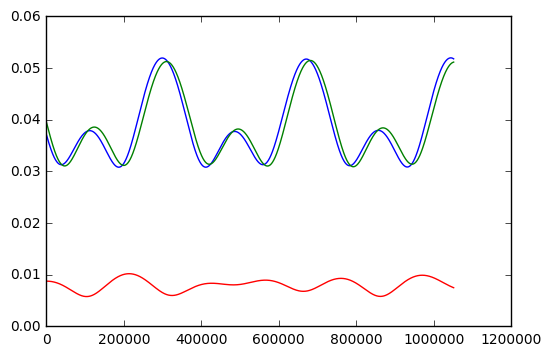

In [27]:
plt.show()

In [10]:
sat1()
min =10;

for i in range(1,10000000000):
    vu=np.sqrt((E1[0,0]-E1[-i,0])**2+(E1[0,1]-E1[-i,1])**2+(E1[0,2]-E1[-i,2])**2);
    if(min>vu):
        min=vu
    else:
        print(min)
        print(i)
        break

KeyboardInterrupt: 

In [27]:
mat = scipy.io.loadmat('./Data/datae.mat')
E1=mat['E1']

In [37]:
len(E1)


3468961